From **linear perturbation theory**

We know that the evolution of density perturbations in a universe dominated by fuzzy dark matter (FDM+SI+SI) without self-interactions can be described by the following differential equation:
\begin{equation}
\ddot{\delta_k} + 2 H \dot {\delta_k} - \left[\frac{h^{2}k^{4}}{4 m^{2} a^{4}} - \frac{4 \pi G \bar{\rho_m}(t)}{a^{3}(t)}  \right]\delta_{k} = 0
\end{equation}

- What are the initial conditions for which numerical time evolution of $\delta_k$ is obtained?
- For every $k$ value, solve the above ODE (using RK method?) and see how $\delta_{k}$ changes with time. 
- Obtain the power spectra for each $k$ value at the last time step and plot $P(k)$ vs $k$. 

In [11]:
output_path = '/home/isha/Desktop/AU/Work_Done/Wave_Dark_Matter/Obtaining_Power_Spectrum/FDM+SI/' 

In [12]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy.integrate import solve_ivp

In [13]:
k_pow = np.arange(-6, 4)   #Mpc^-1
k_val = 10.0 ** k_pow

length_scale = 2 * np.pi / k_val    #Mpc
k_val, length_scale

(array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
        1.e+02, 1.e+03]),
 array([6.28318531e+06, 6.28318531e+05, 6.28318531e+04, 6.28318531e+03,
        6.28318531e+02, 6.28318531e+01, 6.28318531e+00, 6.28318531e-01,
        6.28318531e-02, 6.28318531e-03]))

In [14]:
#Constants taken to be = 1 for testing
G = 1
hbar = 1
m = 1
lambda_param = -1  #Self interaction parameter

**For matter dominant era only**

In [15]:
def scale_factor_a(t):
    return (t**(2/3))

def Hubble_val(t):
    return (2/(3*t))

def rho_matter(t):
    return (1/(6 * np.pi * G * t**2))

#Note that 4 pi G rho_m = 2/(3 t^2) in matter dominated era



Thus the above 2nd order ODE is simplified as

\begin{equation}
\ddot{\delta_k} + \frac{4}{3t} \dot {\delta_k} - \frac{2}{3t^{2}} \delta_{k} = 0
\end{equation}

This can be converted into 1st order as

\begin{equation}
y_{1} = \delta
\end{equation}

\begin{equation}
y_{2} = \dot y_{1} = \dot {\delta}
\end{equation}

The simplified equation then becomes
\begin{equation}
\dot y_{2} + \frac{4}{3t} y_{2} - \frac{2}{3t^{2}} y_{1} = 0
\end{equation}



In [16]:
#Initial conditions for delta_k proportional to a and delta_k_dot propertioonal to 2a/3t
#Also see equation 5.54 in Baumann Cosmology textbook

t_i =  1e-2
t_f = 1e2
t_span = [t_i, t_f]
t_eval = np.logspace(np.log10(t_i), np.log10(t_f), 500)


delta0 = 1 #Arbitrary choice
delta0_dot = 0     #Dont use the analytic expression: 2**delta_k / (3*t_i) 
#Assume initial growth rate is zero

initial_conditions = [delta0, delta0_dot]
initial_conditions

[1, 0]

fig, ax  = plt.subplots(1, 2, figsize=(12,5))
ax[0].plot(t_eval, scale_factor_a(t_eval), label='Scale Factor a(t)')
ax[1].loglog(t_eval, scale_factor_a(t_eval), label='Scale Factor log a(t)')
ax[0].set_xlabel('t')
ax[0].set_ylabel('Scale Factor a(t)')
ax[1].set_xlabel('t')
ax[1].set_ylabel('log a(t)')



In [23]:
#Here we have a second order differential equation in time for each k mode. 
#We can convert this into two first order differential equations as follows:

def ode_fdm_si_allkvals(t, y, k):
    u1, u2 = y      #u1 = delta | u2 = delta_dot
    
    #H = 2 / (3 * t)
    quantum_term = (hbar**2 * k**4) / (4 * m**2 * scale_factor_a(t)**4)
    grav_term = 2 / (3 * t**2 * scale_factor_a(t)**3)
    selfinteraction_term = (3 * lambda_param * rho_matter(t) * k**2) / (8 * m**4 * scale_factor_a(t)**2)

    #Solve the following coupled 1st order ODEs
    du1_dt = u2
    du2_dt_fdm_si = -2*Hubble_val(t)*u2 + (grav_term - quantum_term - selfinteraction_term)*u1
    return [du1_dt, du2_dt_fdm_si]

In [25]:
fdm_si_allkvals = []
for k_i in k_val:
    sol_fdm_si = solve_ivp(
        ode_fdm_si_allkvals,
        t_span,
        initial_conditions,
        t_eval=t_eval,
        args=(k_i,),
        #method = 'LSODA'
    )

    for j in range(len(t_eval)):
        fdm_si_allkvals.append(
            {
                't': t_eval[j],
                'k': k_i,
                'delta_fdm': sol_fdm_si.y[0][j],
                'delta_dot_fdm': sol_fdm_si.y[1][j]
            }
        )


In [40]:

df_fdm_si_allkvals = pd.DataFrame(fdm_si_allkvals)
df_fdm_si_allkvals.to_csv(output_path + 'fdm_si_density_growth_allkvals.csv', index=False)

In [41]:
df_fdm_si_allkvals

,t,k,delta_fdm,delta_dot_fdm
0,0.010000,0.000001,1.000000,0.000000e+00
1,0.010186,0.000001,2.343629,1.673311e+04
2,0.010376,0.000001,9.746748,7.382620e+04
3,0.010569,0.000001,41.248942,3.026886e+05
4,0.010766,0.000001,170.429343,1.205776e+06
...,...,...,...,...
4995,92.882923,1000.000000,-0.002834,-4.183282e+00
4996,94.613238,1000.000000,0.001530,4.929701e+00
4997,96.375787,1000.000000,-0.000517,-5.079039e+00
4998,98.171170,1000.000000,0.000276,4.979037e+00


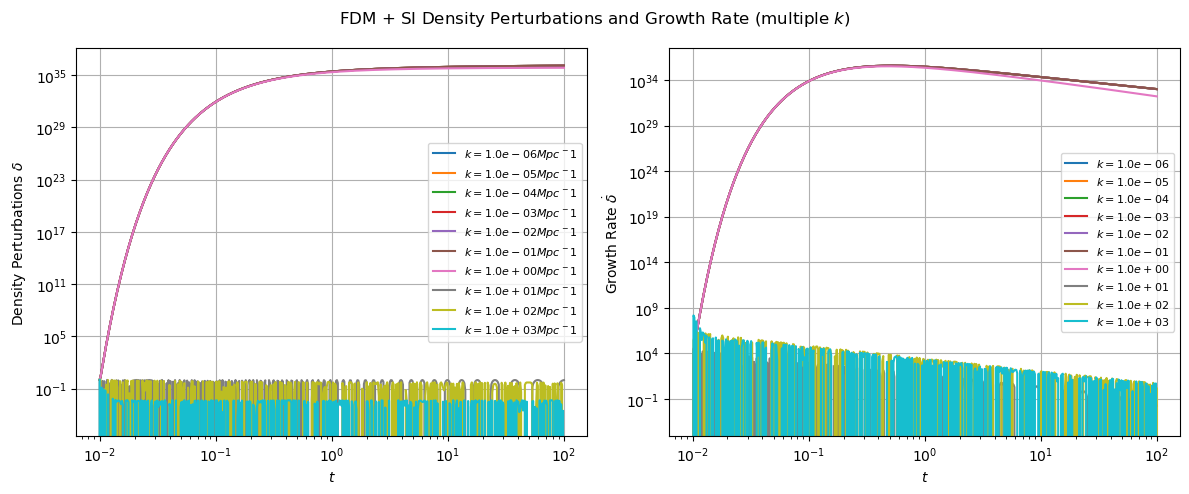

In [42]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

for k_i in sorted(df_fdm_si_allkvals['k'].unique()):
    df_k = df_fdm_si_allkvals[df_fdm_si_allkvals['k'] == k_i]

    ax[0].loglog(
        df_k['t'],
        df_k['delta_fdm'],
        label=fr"$k={k_i:.1e} Mpc^{-1}$"
    )

    ax[1].loglog(
        df_k['t'],
        df_k['delta_dot_fdm'],
        label=fr"$k={k_i:.1e}$"
    )

ax[0].set_ylabel(r"Density Perturbations $\delta$")
ax[1].set_ylabel(r"Growth Rate $\dot{\delta}$")

ax[0].set_xlabel(r"$t$")
ax[1].set_xlabel(r"$t$")

ax[0].grid(True)
ax[1].grid(True)

ax[0].legend(fontsize=8)
ax[1].legend(fontsize=8)

fig.suptitle("FDM + SI Density Perturbations and Growth Rate (multiple $k$)")
fig.tight_layout()
fig.savefig(output_path + "fdm_si_density_growth_allk.png", dpi=300)
plt.show()


In [43]:
t_final_fdm_si = df_fdm_si_allkvals['t'].max()
df_fdm_si_final = df_fdm_si_allkvals[df_fdm_si_allkvals['t'] == t_final_fdm_si]


In [49]:
#As P(k) values are proportional to |delta(k)|^2
df_fdm_si_final['P_k'] = df_fdm_si_final['delta_fdm'] **2
df_fdm_si_final

/tmp/ipykernel_31574/1784845791.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fdm_si_final['P_k'] = df_fdm_si_final['delta_fdm'] **2


,t,k,delta_fdm,delta_dot_fdm,P_k
499,100.0,0.000001,1.249792e+36,1.005320e+33,1.561980e+72
999,100.0,0.000010,1.249792e+36,1.005320e+33,1.561980e+72
1499,100.0,0.000100,1.249792e+36,1.005320e+33,1.561980e+72
1999,100.0,0.001000,1.249792e+36,1.005320e+33,1.561980e+72
2499,100.0,0.010000,1.249810e+36,1.005335e+33,1.562025e+72
2999,100.0,0.100000,1.251532e+36,1.006784e+33,1.566333e+72
3499,100.0,1.000000,7.089748e+35,1.593815e+32,5.026453e+71
3999,100.0,10.000000,9.298283e-01,1.798835e-02,8.645806e-01
4499,100.0,100.000000,-4.764124e-01,1.356567e+00,2.269688e-01
4999,100.0,1000.000000,-1.165610e-03,-4.700251e+00,1.358647e-06


/tmp/ipykernel_31574/423490985.py:6: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,1e75)


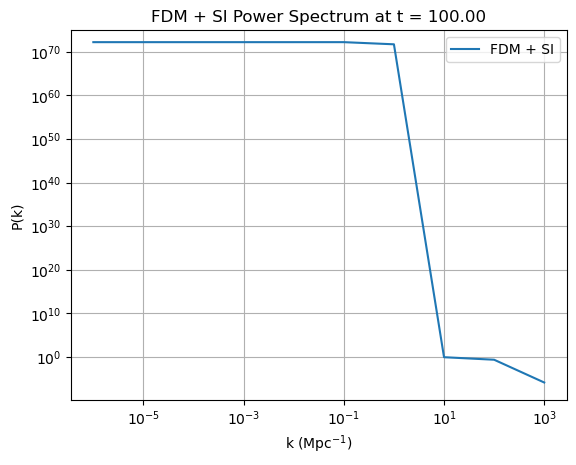

In [48]:
plt.plot(df_fdm_si_final['k'], df_fdm_si_final['P_k'], label='FDM + SI')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k (Mpc$^{-1}$)')
plt.ylabel('P(k)')
plt.ylim(0,1e75)
plt.title('FDM + SI Power Spectrum at t = {:.2f}'.format(t_final_fdm_si))
plt.grid(True)
plt.legend()
plt.savefig(output_path + 'fdm_si_power_spectrum.png', dpi=300)
plt.show()